In [227]:
import matlab.engine
import adaptive
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from functools import partial
import time

In [9]:
eng = matlab.engine.start_matlab()

In [294]:
a,mu,Delta,Vz,alpha_R,mulist,dim,energy,delta=1.0,1.0,.2,0.0,5.0,matlab.double([0]*100),100.0,0.0,0.001
# z=eng.ldosall_dis(a,mu,Delta,Vz,alpha_R,mulist,dim,energy,delta)
# z1=np.asarray(z)


In [385]:
def ldosall_dis(p,a,mu,Delta,alpha_R,mulist,dim,delta):
    Vz,energy=p
#     Vz=matlab.double(Vz.tolist())
#     energy=matlab.double(energy.tolist())
    z=eng.ldosall_dis(matlab.double([a]),matlab.double([mu]),matlab.double([Delta]),matlab.double([Vz]),\
                      matlab.double([alpha_R]),matlab.double(mulist),matlab.double([dim]),matlab.double([energy]),matlab.double([delta]))
    z1=np.asarray(z).flatten()
    return np.array([z1.mean(),z1[0],z1[int(dim/2)],z1[-1]])

In [324]:
type(matlab.double(mulist))

mlarray.double

In [360]:
def ldosall_dis2(p):
    Vz,energy=p
#     Vz=matlab.double(Vz.tolist())
#     energy=matlab.double(energy.tolist())
    z=eng.ldosall_dis(matlab.double([a]),matlab.double([mu]),matlab.double([Delta]),matlab.double([Vz]),\
                      matlab.double([alpha_R]),matlab.double(mulist),matlab.double([dim]),matlab.double([energy]),matlab.double([delta]))
    z1=np.asarray(z).flatten()
    return np.array([z1.mean(),z1[0],z1[int(dim/2)],z1[-1]])

In [387]:
%%time
# ldosall_dis((0.1,0.),a,mu,Delta,alpha_R,mulist,dim,delta)
ldosall_dis2((0.1,0.))

Wall time: 26 ms


array([5.89989044e-04, 5.70601305e-05, 7.40914256e-04, 5.70601305e-05])

In [393]:
learner = adaptive.Learner2D(partial(ldosall_dis,a=a,mu=mu,Delta=Delta,alpha_R=alpha_R,mulist=mulist,dim=dim,delta=delta),\
                             bounds=[(0., 2.), (-0.3, 0.3)])

In [367]:
#learner = adaptive.Learner2D(ldosall_dis2,bounds=[(0., 2.), (-0.3, 0.3)])

In [ ]:
%%time
running = adaptive.runner.simple(learner, goal=lambda l: l.loss() < 0.001)

In [391]:
dd=np.array(list(learner.data.items()))
dz=dd[:,1]
dx=np.empty(dd.shape[0])
dy=np.empty(dd.shape[0])
for i in range(dd.shape[0]):
    dx[i],dy[i]=dd[i,0]
dz=np.vstack(dz)

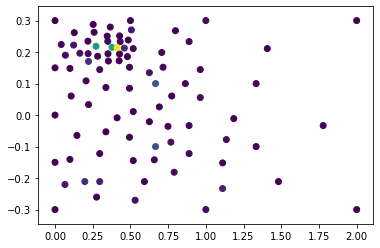

In [392]:
plt.scatter(dx,dy,c=dz[:,0])

In [376]:
dx.size

2318

In [377]:
dxx, dyy = np.meshgrid(np.linspace(0,2,100),np.linspace(-.3,.3,100))
dzz = griddata((dx,dy),dz[:,0],(dxx,dyy), method='linear')

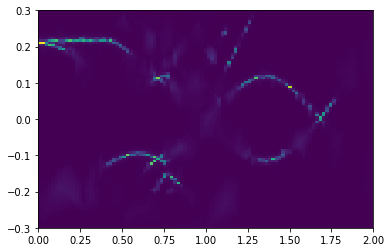

In [378]:
plt.pcolormesh(dxx,dyy,dzz)

# history code

In [4]:
def goal(learner):
    return learner.loss() < 1e-2

In [5]:
y=np.zeros([41,21])

In [7]:
%%time
for vzind in range(21):
    vz=vzind*0.1;
    y[:,vzind]=[eng.dosseqd(1.,1.,0.2,0.,5.,.2,float('Inf'),0.,1.,100.,w/40*0.6-0.3,1e-3) for w in range(41)];   

Wall time: 1min 21s


In [5]:
func=lambda w:eng.dosseqd(1.,1.,0.2,0.,5.,.2,float('Inf'),0.,1.,100.,w,1e-3)

In [17]:
func(0.3)

171.62432629659222

In [44]:
func2=lambda x:float(eng.test(x))

In [43]:
func3=lambda x:x**2

In [45]:
func2(2)

4.0

In [46]:
learner=adaptive.Learner1D(function=func2,bounds=(-.3,.3))

In [47]:
runner=adaptive.Runner(learner,goal)

In [48]:
runner.task.done()

True

In [49]:
d=np.array(list(learner.data.items()))

In [51]:
learner.data

{}

Task exception was never retrieved
future: <Task finished coro=<AsyncRunner._run() done, defined at C:\Users\hnpan\Anaconda3\envs\py36\lib\site-packages\adaptive\runner.py:545> exception=MatlabExecutionError("Undefined function or variable '__getstate__'.\n",)>
Traceback (most recent call last):
  File "C:\Users\hnpan\Anaconda3\envs\py36\lib\site-packages\distributed\worker.py", line 2729, in dumps_function
    result = cache[func]
KeyError: <function <lambda> at 0x00000225D0656158>

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\hnpan\Anaconda3\envs\py36\lib\site-packages\distributed\protocol\pickle.py", line 38, in dumps
    result = pickle.dumps(x, protocol=pickle.HIGHEST_PROTOCOL)
_pickle.PicklingError: Can't pickle <function <lambda> at 0x00000225D0656158>: attribute lookup <lambda> on __main__ failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  F

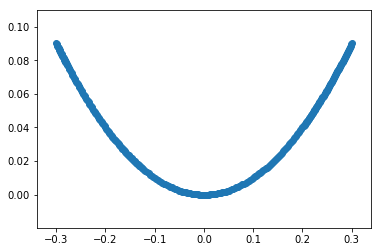

In [35]:
plt.scatter(d[:,0],d[:,1])

In [70]:
p=[func(w/40*0.6-0.3) for w in range(1)]

In [93]:
p=[func(w.item()) for w in np.linspace(-.3,.3,101)]

In [94]:
wl=[w  for w in np.linspace(-.3,.3,101)]

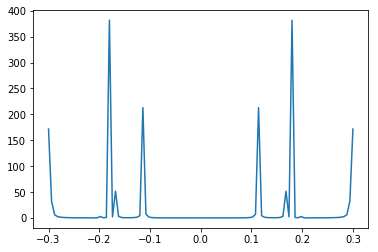

In [95]:
plt.plot(wl,p)

In [55]:
eng.hseqd(1.,1.,0.2,.1,5.,.2,float('Inf'),0.,1.,0,0,1.,100.)

0

In [41]:
eng.test(10.,nargout=0)

In [90]:
y[0,:]=np.ones(21)

In [92]:
y

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.,

In [38]:
import sys
print(sys.version)

3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


In [47]:
a.result()

AttributeError: 'double' object has no attribute 'result'